# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [2]:
#Create a connection with create_engine to MySQL Workbench:
import getpass
saved_password = getpass.getpass()

In [3]:
# i dont get the connection using sqlalchemy
import mysql.connector
cnx = mysql.connector.connect(host='localhost', port = 3306, database = "uml_wholesale_customers", user = "root", password = saved_password)

In [4]:
cnx.is_connected() # to check the connection
cursor = cnx.cursor()

In [5]:
query = ("SELECT * FROM wholesale_customers_data")
cursor.execute(query)
results = cursor.fetchall()

#extract column names
columns= [desc[0] for desc in cursor.description]
customers = pd.DataFrame(results, columns=columns)
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [6]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


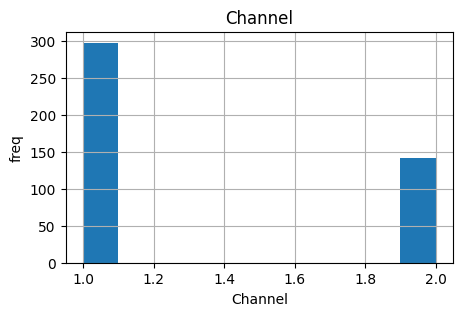

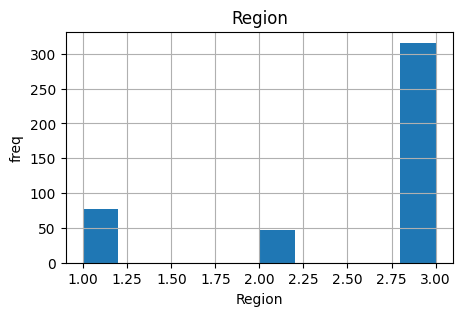

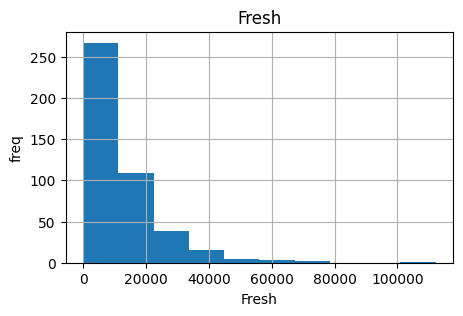

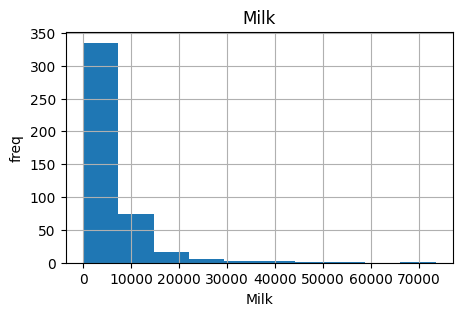

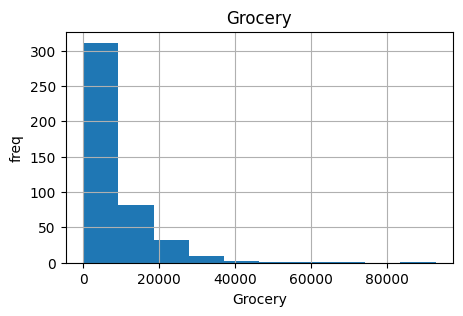

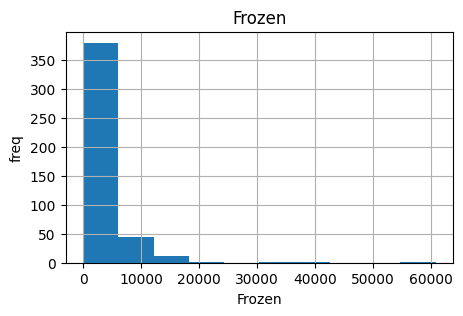

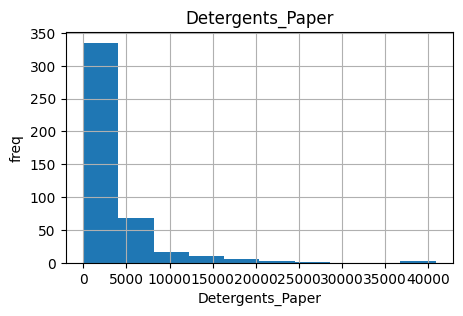

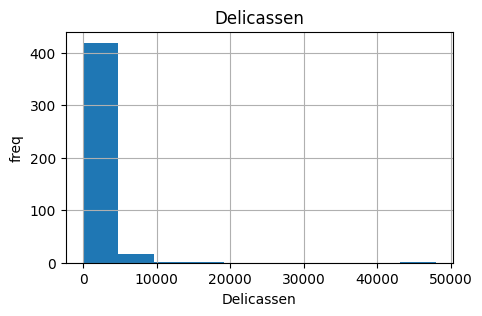

In [7]:
for col in customers.columns:
    plt.figure(figsize=(5, 3))
    customers[col].hist()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('freq')
    plt.show()

In [8]:
#outlier detection
customers[customers['Delicassen']>customers['Delicassen'].quantile(0.997)] #2
customers[customers['Detergents_Paper']>customers['Detergents_Paper'].quantile(0.997)] #2
customers[customers['Frozen']>customers['Frozen'].quantile(0.995)] #3
customers[customers['Grocery']>customers['Grocery'].quantile(0.99)] #5
customers[customers['Milk']>customers['Milk'].quantile(0.99)] #5
customers[customers['Fresh']>customers['Fresh'].quantile(0.997)] #2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
125,1,3,76237,3473,7102,16538,778,918
181,1,3,112151,29627,18148,16745,4948,8550


<Axes: >

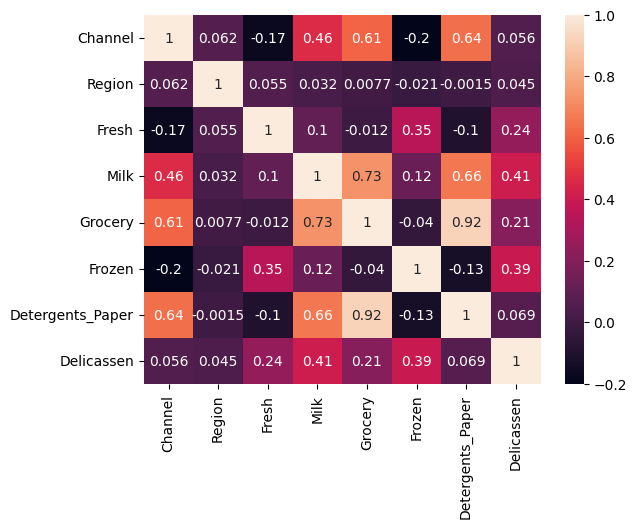

In [9]:
#correlation
import seaborn as sns
sns.heatmap(customers.corr(), annot=True)


In [10]:
for col in customers.columns:
    print(col, 'sum: ', customers[col].sum())

Channel sum:  582
Region sum:  1119
Fresh sum:  5280131
Milk sum:  2550357
Grocery sum:  3498562
Frozen sum:  1351650
Detergents_Paper sum:  1267857
Delicassen sum:  670943


In [11]:
#observations 
#all columns numeric
#different scales across the columns 
#Grocery and Detergents Paper are highly correlated. also Milk and Grocery
#some 'outliers' however i wouldnt remove them

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [12]:
# Your code here

In [13]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)
customers_scale

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]], shape=(440, 8))

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers_scale)
customers['labels'] = kmeans.labels_
customers

c:\Users\Anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Anast\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Anast\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Anast\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


Count the values in `labels`.

In [16]:
customers['labels'].value_counts()


labels
0    297
1    130
2     13
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [29]:
from sklearn.cluster import DBSCAN 
db_model = DBSCAN(eps=0.5)
db_labels = db_model.fit_predict(customers_scale)
customers['labels_DBSCAN'] = db_labels

Count the values in `labels_DBSCAN`.

In [30]:
# Your code here
customers['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 0      5
 7      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN Clustering')

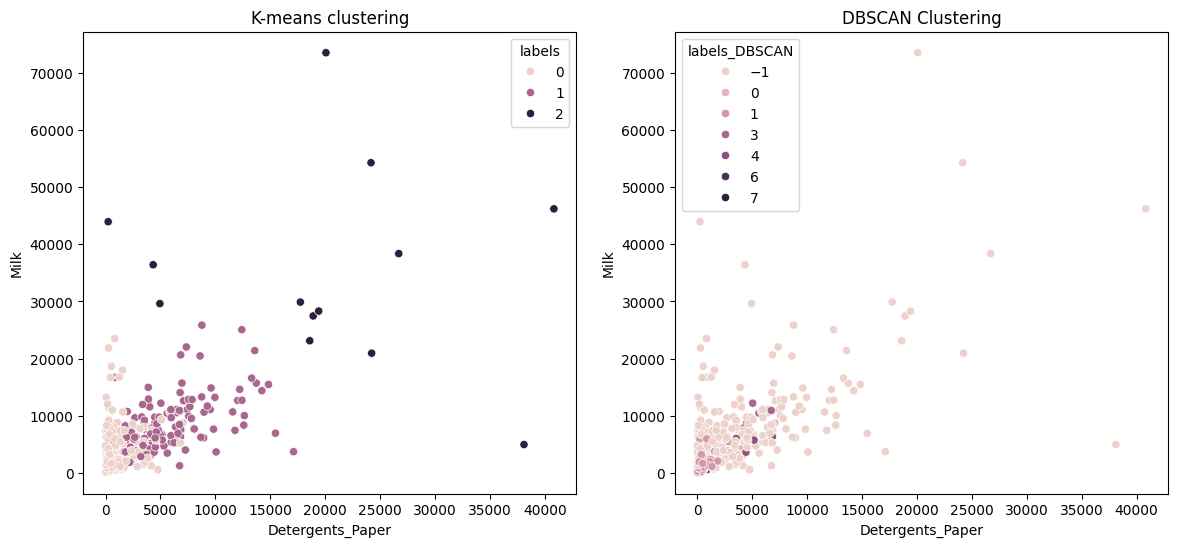

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Detergents_Paper', y='Milk', data=customers, hue='labels', ax=axes[0])
axes[0].set_title('K-means clustering')
sns.scatterplot(x='Detergents_Paper', y='Milk', data=customers, hue='labels_DBSCAN', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN Clustering')

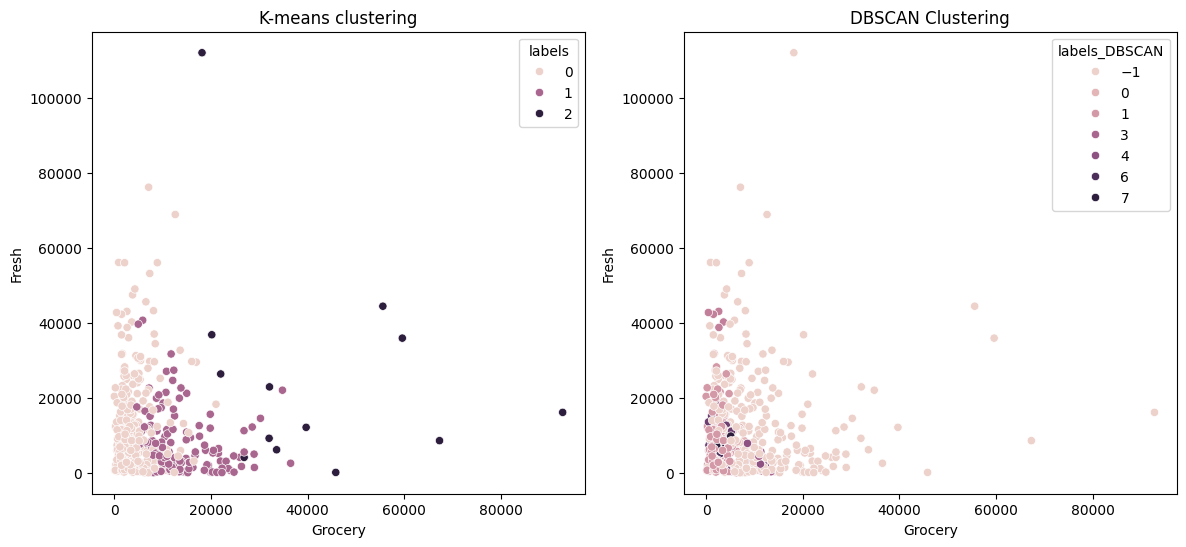

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Grocery', y='Fresh', data=customers, hue='labels', ax=axes[0])
axes[0].set_title('K-means clustering')
sns.scatterplot(x='Grocery', y='Fresh', data=customers, hue='labels_DBSCAN', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0.5, 1.0, 'DBSCAN Clustering')

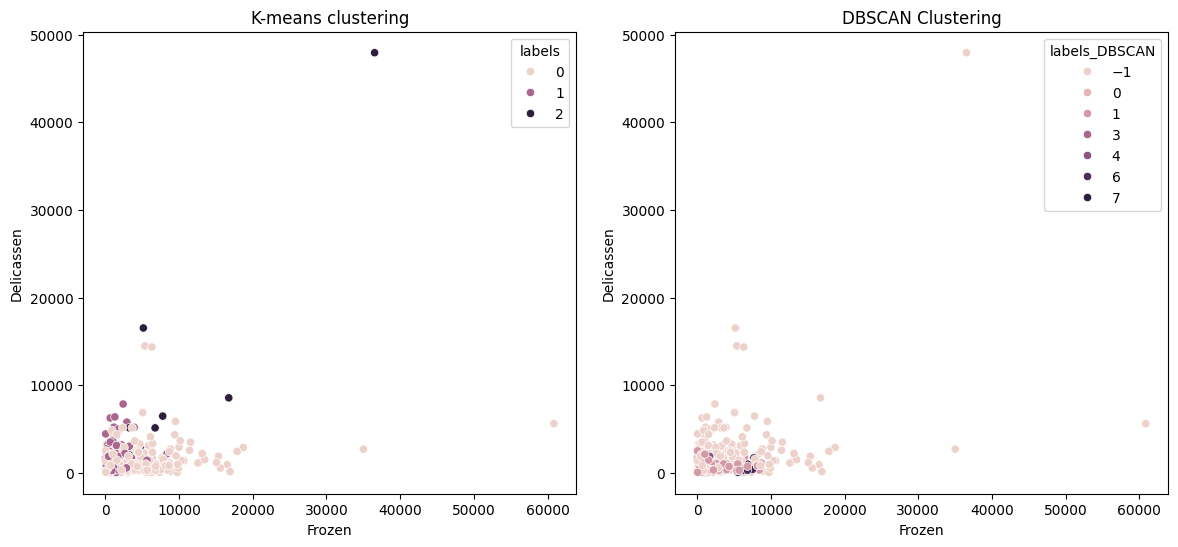

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Frozen', y='Delicassen', data=customers, hue='labels', ax=axes[0])
axes[0].set_title('K-means clustering')
sns.scatterplot(x='Frozen', y='Delicassen', data=customers, hue='labels_DBSCAN', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [47]:
# Your code here:
mean_kmeans = customers.groupby('labels').mean()
mean_dbscan = customers.groupby('labels_DBSCAN').mean()
display(mean_kmeans)
display(mean_dbscan)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.003367,2.505051,13075.898990,3218.737374,3855.696970,3620.400673,776.875421,1242.249158,0.646465
1,2.000000,2.623077,8165.915385,8748.515385,13905.492308,1441.630769,5991.146154,1535.007692,-0.538462
2,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692,-1.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.545098
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
#k-means produces 3 weel separated and interepretable customer segments
#DBSCAN identifies outliers and smaller and more specific clusters
#if the goal is to identify interepretable and broad clusters, then k-means performs better
#if the goal is to detect nice customers and relove noise - then DBSCAN performans better

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

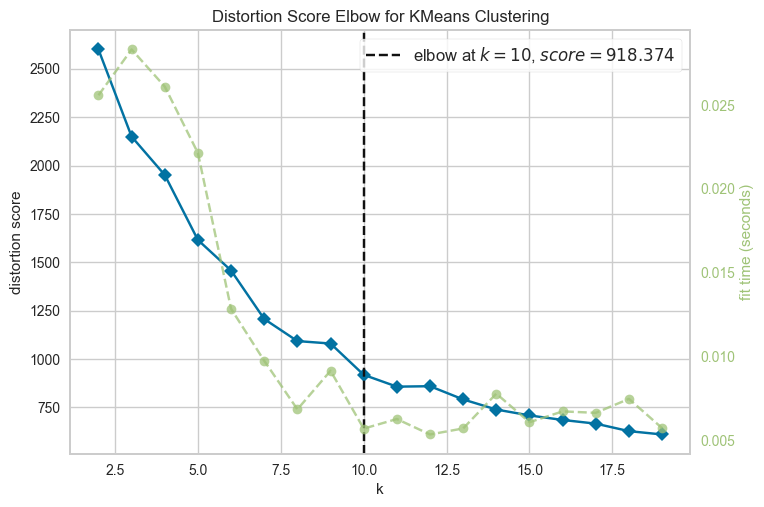

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Visualizer = KElbowVisualizer(kmeans, k=(2, 20))
Visualizer.fit(customers_scale)
Visualizer.poof()


In [ ]:
#k-means works best with 10 clusters

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [26]:
# Your code here

In [27]:
# Your comment here